In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Calc_parameters import *
from scipy.ndimage import gaussian_filter1d

C:\Users\saiak\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import data
data = pd.read_excel('qCRISPRi_wildVSmutant_130221_cleaned.xlsx')
data

,time,wildgfp1,wildgfp2,wildgfp3,mutantgfp1,mutantgfp2,mutantgfp3,wildod1,wildod2,wildod3,...,mutantod2,mutantod3,avgwildgfp,stdwildgfp,avgmutantgfp,stdmutantgfp,avgwildod,stdwildod,avgmutantod,stdmutantod
0,0.00,1444.308495,1146.560329,691.268214,1763.925153,1449.135992,1766.200962,0.027233,0.033433,0.064133,...,0.034733,0.026233,1094.045680,379.256849,1659.754036,182.404125,0.041600,0.019759,0.028700,0.005254
1,0.25,1510.791167,1152.814995,716.510970,1642.335951,1588.784949,2000.000427,0.027800,0.037300,0.064200,...,0.032100,0.025500,1126.705711,397.783268,1743.707109,223.565709,0.043100,0.018880,0.028333,0.003398
2,0.50,1661.375831,1287.297323,995.203794,2034.313838,2088.744600,2482.566015,0.031500,0.039100,0.055600,...,0.030800,0.023900,1314.625649,333.925776,2201.874818,244.604453,0.042067,0.012321,0.027300,0.003451
3,0.75,1966.292320,1603.773303,1350.877163,2483.221245,2469.879464,3098.038670,0.035600,0.042400,0.057000,...,0.033200,0.025500,1640.314262,309.330544,2683.713127,358.878451,0.045000,0.010934,0.029500,0.003859
4,1.00,2270.531104,1827.515592,1623.794215,2732.557652,2794.520779,3390.411816,0.041400,0.048700,0.062200,...,0.036500,0.029200,1907.280304,330.664418,2972.496749,363.248688,0.050767,0.010553,0.033367,0.003758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,21.17,1163.493745,1128.385507,1098.875165,2403.565972,2298.699025,2345.658504,0.407967,0.407367,0.423767,...,0.404867,0.398467,1130.251472,32.349677,2349.307834,52.528633,0.413033,0.009300,0.397400,0.008053
84,21.42,1145.106386,1147.868083,1089.387702,2408.885613,2307.950487,2349.433058,0.410733,0.401033,0.426233,...,0.397033,0.396833,1127.454057,32.995337,2355.423053,50.733470,0.412667,0.012711,0.392667,0.007391
85,21.67,1177.341034,1137.919755,1083.111667,2402.108953,2312.172355,2337.912690,0.405433,0.408933,0.425933,...,0.400633,0.397933,1132.790818,47.323598,2350.731333,46.318313,0.413433,0.010966,0.394733,0.007996
86,21.92,1181.327849,1115.211175,1065.548298,2420.404458,2302.362530,2281.790407,0.395600,0.406500,0.429200,...,0.399300,0.402900,1120.695774,58.084307,2334.852465,74.800807,0.410433,0.017142,0.393733,0.012886


In [3]:
wild_params = pd.DataFrame()
col = data.columns
for i in range(1,4):
    maxgfp = max(data[col[i]])
    density = switch_density_generic(data[col[i]], data[col[i+6]])
    fold = foldRepression_generic(data[col[i]])
    trans_time = transition_time_generic(data[col[i]], data['time'])
    newrow = {'MaxGFP':maxgfp, 'act_density': density, 'FoldRepression':fold, 'Transition_time':trans_time}
    wild_params = wild_params.append(newrow, ignore_index = True)

mutant_params = pd.DataFrame()
col = data.columns
for i in range(4,7):
    maxgfp = max(data[col[i]])
    density = switch_density_generic(data[col[i]], data[col[i+6]])
    fold = foldRepression_generic(data[col[i]])
    trans_time = transition_time_generic(data[col[i]], data['time'])
    newrow = {'MaxGFP':maxgfp, 'act_density': density, 'FoldRepression':fold, 'Transition_time':trans_time}
    mutant_params = mutant_params.append(newrow, ignore_index = True)

In [4]:
avg_wild = wild_params.mean()
std_wild = wild_params.std()
avg_mutant = mutant_params.mean()
std_mutant = mutant_params.std()

In [5]:
final_params = pd.DataFrame(columns = ['wildtype', 'mutant'], index = ['maxgfp', 'act_density', 'foldrepression', 'transition_time'])
row1 = {'wildtype': avg_wild['MaxGFP'], 'mutant':avg_mutant['MaxGFP']}
row2 = {'wildtype': avg_wild['act_density'], 'mutant':avg_mutant['act_density']}
row3 = {'wildtype': avg_wild['FoldRepression'], 'mutant':avg_mutant['FoldRepression']}
row4 = {'wildtype': avg_wild['Transition_time'], 'mutant':avg_mutant['Transition_time']}
final_params.loc['maxgfp'] = row1
final_params.loc['act_density'] = row2
final_params.loc['foldrepression'] = row3
final_params.loc['transition_time'] = row4
final_params['percent_change'] = 100*(final_params.mutant - final_params.wildtype)/final_params.wildtype
final_params

,wildtype,mutant,percent_change
maxgfp,3792.662248,6322.917249,66.714483
act_density,0.397267,0.3949,-0.595737
foldrepression,3.494785,2.729362,-21.901842
transition_time,12.583333,11.25,-10.596026


# Bar plot for dynamics parameters

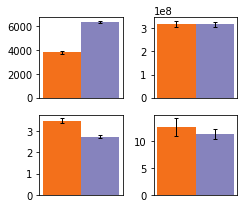

In [7]:
wild_params.mean()['FoldRepression']

cmap1 = plt.get_cmap('Oranges')
color1 = cmap1(0.6)
cmap2 = plt.get_cmap('Purples')
color2 = cmap2(0.6)

od2cfu = 8*10**8
width = 0.25  # the width of the bars
x1 = [0,0 + width]
fig, ((ax1, ax11),(ax2, ax21)) = plt.subplots(2,2, figsize=(3.5,3))
ax1.bar(0        , avg_wild['MaxGFP'], width, color = color1)
ax1.bar(0 + width, avg_mutant['MaxGFP'], width, color = color2)
ax1.errorbar(x1, [avg_wild['MaxGFP'],avg_mutant['MaxGFP']], yerr=[std_wild['MaxGFP'],std_mutant['MaxGFP']], fmt="none", ecolor="black", elinewidth=1, capsize=2)

x2 = [1 - width, 1 ]
#ax11 = ax1.twinx()
ax11.bar(1 - width , avg_wild['act_density']*od2cfu, width, color = color1)
ax11.bar(1 , avg_mutant['act_density']*od2cfu, width, color = color2)
ax11.errorbar(x2, [avg_wild['act_density']*od2cfu,avg_mutant['act_density']*od2cfu], yerr=[std_wild['act_density']*od2cfu,std_mutant['act_density']*od2cfu], fmt="none", ecolor="black", elinewidth=1, capsize=2)
#ax1.set_ylabel('GFP (au)')
#ax11.set_ylabel('CFU/mL')

ax2.bar(0        , avg_wild['FoldRepression'], width, color = color1)
ax2.bar(0 + width, avg_mutant['FoldRepression'], width, color = color2)
ax2.errorbar(x1, [avg_wild['FoldRepression'],avg_mutant['FoldRepression']], yerr=[std_wild['FoldRepression'],std_mutant['FoldRepression']], fmt="none", ecolor="black", elinewidth=1, capsize=2)


#ax21 = ax2.twinx()
ax21.bar(1 - width , avg_wild['Transition_time'], width, color = color1)
ax21.bar(1 , avg_mutant['Transition_time'], width, color = color2)
ax21.errorbar(x2, [avg_wild['Transition_time'],avg_mutant['Transition_time']], yerr=[std_wild['Transition_time'],std_mutant['Transition_time']], fmt="none", ecolor="black", elinewidth=1, capsize=2)
#ax2.set_ylabel('Fold Change')
#ax21.set_ylabel('Hours')

ax1.tick_params(bottom = False)
ax2.tick_params(bottom = False)
ax11.tick_params(bottom = False)
ax21.tick_params(bottom = False)

ax1.set_xticklabels(labels = '')
ax2.set_xticklabels(labels = '')
ax11.set_xticklabels(labels = '')
ax21.set_xticklabels(labels = '')
fig.tight_layout()
fig.savefig('Figures\LuxR_str_param_exp.png',dpi = 450,  bbox_inches = 'tight')

# dynamics plot

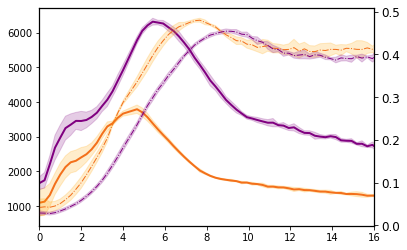

In [19]:
cmap1 = plt.get_cmap('Oranges')
color1 = cmap1(0.6)
s = 0.1
#using gaussian filter to smooth out the curves
upper_wild = gaussian_filter1d((data.avgwildgfp + data.stdwildgfp), sigma = s)
lower_wild = gaussian_filter1d((data.avgwildgfp - data.stdwildgfp), sigma = s)
upper_mutant = gaussian_filter1d((data.avgmutantgfp + data.stdmutantgfp), sigma = s)
lower_mutant = gaussian_filter1d((data.avgmutantgfp - data.stdmutantgfp), sigma = s)

#using gaussian filter to smooth od curves
upper_wild_od = gaussian_filter1d((data.avgwildod + data.stdwildod), sigma = s)
lower_wild_od = gaussian_filter1d((data.avgwildod - data.stdwildod), sigma = s)
upper_mutant_od = gaussian_filter1d((data.avgmutantod + data.stdmutantod), sigma = s)
lower_mutant_od = gaussian_filter1d((data.avgmutantod - data.stdmutantod), sigma = s)


fig, ax = plt.subplots()
ax.plot(data.time, data.avgwildgfp,linewidth = 2, color = color1)
ax.fill_between(data.time, upper_wild, lower_wild, color='orange', alpha=0.2)
ax.plot(data.time,data.avgmutantgfp, linewidth = 2, color = 'purple')
ax.fill_between(data.time, upper_mutant, lower_mutant, color='purple', alpha=0.2)

ax2 = ax.twinx()
ax2.plot(data.time, data.avgwildod, '-.',linewidth = 1, color = color1)
ax2.fill_between(data.time, upper_wild_od, lower_wild_od, color='orange', alpha=0.2)
ax2.plot(data.time,data.avgmutantod, '-.', linewidth = 1, color = 'purple')
ax2.fill_between(data.time, upper_mutant_od, lower_mutant_od, color='purple', alpha=0.2)

ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
#ax.set_xlabel('Time (hr)', fontsize = 16)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 16)
#ax.legend(loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.rc('legend', fontsize=12)
#plt.legend(title = 'qCRISPRi', fontsize = 12)
plt.savefig('Figures\LuxR_str_dynamics_exp.png', dpi = 300, bbox_inches = 'tight')

# od profiles

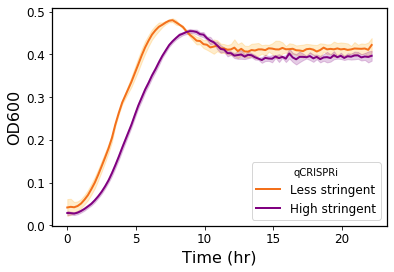

In [3]:
cmap1 = plt.get_cmap('Oranges')
color1 = cmap1(0.6)
s = 0.1
#using gaussian filter to smooth out the curves
upper_wild = gaussian_filter1d((data.avgwildod + data.stdwildod), sigma = s)
lower_wild = gaussian_filter1d((data.avgwildod - data.stdwildod), sigma = s)
upper_mutant = gaussian_filter1d((data.avgmutantod + data.stdmutantod), sigma = s)
lower_mutant = gaussian_filter1d((data.avgmutantod - data.stdmutantod), sigma = s)

fig, ax = plt.subplots()
ax.plot(data.time, data.avgwildod,linewidth = 2, color = color1, label = 'Less stringent')
ax.fill_between(data.time, upper_wild, lower_wild, color='orange', alpha=0.2)
ax.plot(data.time,data.avgmutantod, linewidth = 2, color = 'purple', label = 'High stringent')
ax.fill_between(data.time, upper_mutant, lower_mutant, color='purple', alpha=0.2)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
ax.set_xlabel('Time (hr)', fontsize = 16)
ax.set_ylabel('OD600',  fontsize = 16)
ax.legend(loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=12)
plt.legend(title = 'qCRISPRi', fontsize = 12)
plt.savefig('Figures\LuxR_str_od_exp.png', dpi = 400, bbox_inches = 'tight')

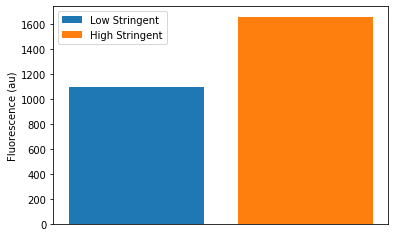

In [12]:
fig, ax = plt.subplots()
ax.bar(0, data.avgwildgfp[0], label = 'Low Stringent')
ax.bar(1, data.avgmutantgfp[0], label = 'High Stringent')
ax.legend()

ax.tick_params(bottom = False)

ax.set_xticklabels(labels = '')
ax.set_ylabel('Fluorescence (au)')
plt.savefig('Figures\GFP_fluorescence_t0.png', dpi = 400, bbox_inches = 'tight')